In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

In [2]:
df = pd.read_excel('yahoo_data.xlsx')

In [3]:
df

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000
...,...,...,...,...,...,...,...
1253,"May 07, 2018",24317.66,24479.45,24263.42,24357.32,24357.32,307670000
1254,"May 04, 2018",23865.22,24333.35,23778.87,24262.51,24262.51,329480000
1255,"May 03, 2018",23836.23,23996.15,23531.31,23930.15,23930.15,389240000
1256,"May 02, 2018",24097.63,24185.52,23886.30,23924.98,23924.98,385350000


In [4]:
df.shape

(1258, 7)

In [5]:
x1 = df.drop("Close*", axis = 1)
x2 = x1.drop("Adj Close**", axis = 1)
x = x2.drop("Date", axis = 1)
y = df["Close*"]

In [6]:
x

,Open,High,Low,Volume
0,33797.43,34104.56,33728.40,354310000
1,33381.66,33859.75,33374.65,343240000
2,33596.34,33645.83,33235.85,321170000
3,33828.34,33875.49,33525.39,297880000
4,33805.04,33891.15,33726.09,252020000
...,...,...,...,...
1253,24317.66,24479.45,24263.42,307670000
1254,23865.22,24333.35,23778.87,329480000
1255,23836.23,23996.15,23531.31,389240000
1256,24097.63,24185.52,23886.30,385350000


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [8]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [9]:
def calculate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scores = r2_score(y_test, y_pred)
    
    print(f"Mean square error : {mse}\nRoot mean square error : {rmse}\nr2_score : {r2_scores}")

In [10]:
calculate_metrics(y_test, y_pred)

Mean square error : 16757.502209876217
Root mean square error : 129.45077137613438
r2_score : 0.9989520116217416


In [11]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Define search space
C_values = range(1, 101)
epsilon_values = [0.01, 0.05, 0.1, 0.2, 0.5]
gamma_values = [0.01, 0.05, 0.1, 0.2, 0.5, 1]

# Initialize variables to track the best model
best_model = None
best_params = {}
lowest_error = float("inf")

# Grid search over hyperparameters
for C_value in C_values:
    for ep in epsilon_values:
        for gamma in gamma_values:
            svr_model = SVR(kernel='poly', C=C_value, gamma=gamma, epsilon=ep)
            svr_model.fit(x_train_scaled, y_train)
            svr_predict = svr_model.predict(x_test_scaled)

            # Calculate error (MSE)
            error = mean_squared_error(y_test, svr_predict)

            # Update best model if this one is better
            if error < lowest_error:
                lowest_error = error
                best_model = svr_model
                best_params = {"C": C_value, "epsilon": ep, "gamma": gamma}

In [ ]:
calculate_metrics(y_test, svr_predict)

Mean square error : 3907527.608883112
Root mean square error : 1976.7467235038262
r2_score : 0.7556292417243473


In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    svr_model, x_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10)
)

train_errors = -np.mean(train_scores, axis=1)  
test_errors = -np.mean(test_scores, axis=1)

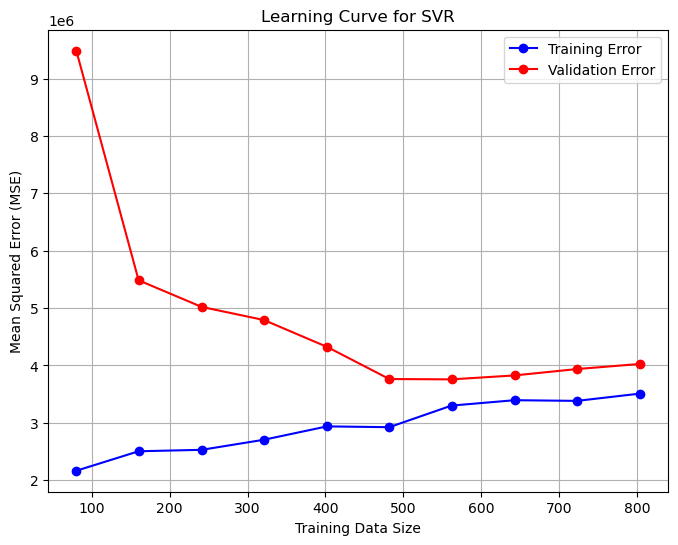

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_errors, 'o-', label="Training Error", color="blue")
plt.plot(train_sizes, test_errors, 'o-', label="Validation Error", color="red")
plt.xlabel("Training Data Size")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Learning Curve for SVR")
plt.legend()
plt.grid()
plt.show()
